<a href="https://colab.research.google.com/github/SauloSilva/IPCV-2020/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**

Intructions for the assignment: link

## **Part 1: Google Colab Setup**
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.


Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. You can use command line instructions like `ls` and `cd` to find the folder that this notebook is stored. Move to this folder by changing the code below to access your folder:

In [ ]:
%cd drive/'My Drive'/IPCV-2020/Assignment-1/

/content/drive/My Drive/IPCV-2020/Assignment-1


3. If you're using python scripts together with your implementation we recommend using the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) extension. This allows us to edit .py source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [ ]:
%load_ext autoreload
%autoreload 2

### **Part 2: PyTorch Tensors**

As instructed in class we'll be using PyTorch in all throught the semester, for more information check the assignment instructions page and the references provided.

1. Start by importing and checking PyTorch version. In case you're running locally, you must be sure to have [installed](https://pytorch.org/get-started/locally/) the latest version in a proper environment.

In [ ]:
import torch
print(torch.__version__)

1.7.0+cu101


In [ ]:
# Example
# 2x2 tensor built from a regular array
T = torch.tensor( [ [1,2], [3, 4] ] )
print(T)
print('---------------')

T_row = T[0,:]
T_cln = T[:,0]
T_e =   T[0,0].item()
print(T[0,0], T_e)
print('---------------')
 
print(T.dtype)
print('---------------')
print(T.size())

tensor([[1, 2],
        [3, 4]])
---------------
tensor(1) 1
---------------
torch.int64
---------------
torch.Size([2, 2])


2. Run the example above, or a similar one, but experiment using the functions: `torch.Tensor`, `torch.as_tensor` and `torch.empty` when creating tensors. You should also check `torch.set_default_dtype` and experiment with it. See [doc](https://pytorch.org/docs/stable/torch.html#)
3. You must check for differences in how PyTorch handles memory and data type.
4. Write on markdown or as a comment a brief comment on what is the difference between using those or the standard `torch.tensor`.

In [ ]:
##############################################################################
# Code for 2-4.
##############################################################################

def checker(tensor):
  print(tensor)
  print('---------------')

  T_row = tensor[0,:]
  T_cln = tensor[:,0]
  T_e =   tensor[0,0].item()
  print(T_row, T_cln, T[0,0], T_e)
  print('---------------')
  
  print(tensor.dtype)
  print('---------------')
  print(tensor.size())

print('torch.Tensor: Ele cria um tensor, porém usa o tipo float32')
Tensor = torch.Tensor( [ [1,2], [3, 4] ] )
checker(Tensor)

print('========================================================\n')

print('torch.as_tensor: Ele cria um tensor, porém usa o tipo int64')
asTensor = torch.as_tensor( [ [1,2], [3, 4] ] )
checker(asTensor)

print('========================================================\n')

print(torch.tensor( [1.3, 2] ).dtype)
torch.set_default_dtype(torch.float32)
# troca os tipos dos tensores
print(torch.tensor( [1.3, 2] ).dtype)


print('========================================================\n')

print('torch.empty: cria um objeto de tensor vazio')
empty = torch.empty
print(empty)

print('========================================================\n')


5. Write a function that receives a 2D tensor as input and returns a tensor of same size that is 
- equal to the input on the first row
- 2 times the input's second row on the second row
- 3 times the input's third row on the third row
- etc..

For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

6. You must use tensor operations to do so, which means no loops.
  **Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

7. *Extra*: You can also implement a simpler version using loops and simple indexing, and then compare the two functions using `times` for large tensors (ex: `torch.ones(1000,500)`).

In [ ]:
##############################################################################
# Code for 5-7.
##############################################################################
import torch
import time

start_time_1 = time.time()

# torch.ones(4, 8)
list_1 = torch.ones(1000, 500)
# torch.arange(2, 10, 2).view(4, 1)
list_2 = torch.arange(2, 2002, 2).view(1000, 1)

mult = torch.mul(list_1, list_2)
print(mult)

print("--- %s seconds of torch.mul ---" % (time.time() - start_time_1))


start_time_2 = time.time()
a, b = torch.broadcast_tensors(list_1, list_2)
print(b)
print("--- %s seconds of torch.broadcast_tensors ---" % (time.time() - start_time_2))

start_time_3 = time.time()
for i, t in enumerate(torch.ones(1000, 500)):
  list_3 = torch.arange(2, 2002, 2)[i]
  torch.mul(t, list_3)

print("--- %s seconds ---" % (time.time() - start_time_3))

tensor([[   2.,    2.,    2.,  ...,    2.,    2.,    2.],
        [   4.,    4.,    4.,  ...,    4.,    4.,    4.],
        [   6.,    6.,    6.,  ...,    6.,    6.,    6.],
        ...,
        [1996., 1996., 1996.,  ..., 1996., 1996., 1996.],
        [1998., 1998., 1998.,  ..., 1998., 1998., 1998.],
        [2000., 2000., 2000.,  ..., 2000., 2000., 2000.]])
--- 0.1676652431488037 seconds of torch.mul ---
tensor([[   2,    2,    2,  ...,    2,    2,    2],
        [   4,    4,    4,  ...,    4,    4,    4],
        [   6,    6,    6,  ...,    6,    6,    6],
        ...,
        [1996, 1996, 1996,  ..., 1996, 1996, 1996],
        [1998, 1998, 1998,  ..., 1998, 1998, 1998],
        [2000, 2000, 2000,  ..., 2000, 2000, 2000]])
--- 0.0018329620361328125 seconds of torch.broadcast_tensors ---
--- 0.04192018508911133 seconds ---


For the following parts you'll practice how to train and evaluate a neural 

*   List item
*   List item

network trained on MNIST.

### **Part 3: Handling Data**

**MNIST**, is a famous dataset containing 70,000 grayscale hand-written digits (0-9) and their associated values. PyTorch `torchvision.dataset` gives us access to a few datasets including this one. The dataset is divided as 60,000 training images and 10,000 for the test set.

Using MNIST you should construct a neural network classifier that can predict the digits in an image.


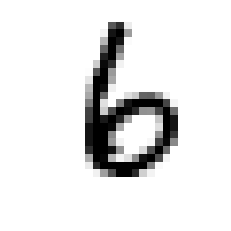

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST

#example
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,)) ])
mnist_data = MNIST(os.getcwd(), download=True, transform=mnist_transform)

image, label = mnist_data.__getitem__(2020)
plt.imshow(  image.view(28,28).numpy(), cmap = 'gray_r' )
plt.axis('off')
plt.show()

1. Now you must create a train-test-val split. 
  * First check [here](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist) to know how to get a train-test split. Then use `random_split` to break your train set in a ratio [55000, 5000]. 
  * Create their respective loaders using `DataLoader`.
  * Create a function that receives a batch of images and can plot them in a organized manner. Check [here](https://matplotlib.org/3.3.1/tutorials/index.html).
  * Check the size of the datasets, as well as the shape of the images.
  * Check how balanced each dataset split is: You can use `torch.bincount` feature.

In [ ]:
##############################################################################
# Code for 1.
##############################################################################

from torch.utils.data import random_split, DataLoader

import numpy as np
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST
import os


mnist_transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,)) ])

mnist_data = torchvision.datasets.MNIST(os.getcwd(), train=True, download=True, transform=mnist_transform)
mnist_train, mnist_val = random_split(mnist_data, [55000, 5000])

mnist_test = torchvision.datasets.MNIST(os.getcwd(), train=False, download=True, transform=mnist_transform)

BZ=64
loader_train = DataLoader(mnist_train, batch_size=BZ)
loader_val = DataLoader(mnist_val, batch_size=BZ)
loader_test = DataLoader(mnist_test, batch_size=BZ)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


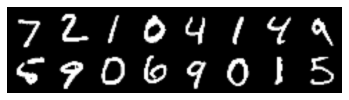

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show(image, nrow=8):
  img_grid = torchvision.utils.make_grid(image, nrow=nrow).numpy()
  plt.figure()
  plt.imshow(np.transpose(img_grid, (1, 2, 0)), interpolation='gaussian')
  plt.axis('off')
  plt.show()


images, _ = iter(loader_test).next()
show(images[:16])


In [ ]:
mnist_data.targets.bincount()

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

2. Using `torch.nn` define a two layers feedforward neural network with a ReLU activation. The network must receive the image in its original shape, and reshape it in order to pass throught the linear layers.

In [ ]:
import torch.nn as nn

class TwoLayerNN(nn.Module):
  def __init__(self, dim_in, dim_hidden, dim_out):
    super(TwoLayerNN, self).__init__();
    self.linear_1 = nn.Linear(dim_in, dim_hidden)
    self.act = nn.ReLU()
    self.linear_2 = nn.Linear(dim_hidden, dim_out)
  
  def forward(self, x):
    x = x.flatten(start_dim=1)
    h = self.linear_1(x)
    h = self.act(h)
    y = self.linear_2(h)
    return y

dim_in, dim_hidden, dim_out = 28 * 28, 128, 10

model = TwoLayerNN(dim_in, dim_hidden, dim_out)
pred = model(images)

In [ ]:
pred.size()

torch.Size([64, 10])

3. Using the `CrossEntropyLoss` loss function you must set a SGD optimizer and train your network on the MNIST for at least 10 epochs. You should set a print statement or a progress bar to print your training loss.

4. Test your model in your test dataset. Remember to use `torch.no_grad`.

5. Change your learning rate and batch size one or two times to observe how the test performance varies.

In [ ]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(list(model.parameters()), lr=0.01)

In [ ]:
for epoch in range(5):
  print("------------------------")
  for idx, (img_batch, y_batch) in enumerate(loader_train):
    y_pred = model(img_batch)
    error = loss(y_pred, y_batch)

    optim.zero_grad()
    error.backward()
    optim.step()

    if idx % 100 == 0:
      print("epoch: {}, step: {}, loss: {}".format(epoch, idx, error.item()))

------------------------
epoch: 0, step: 0, loss: 0.005780158098787069
epoch: 0, step: 100, loss: 0.0018376903608441353
epoch: 0, step: 200, loss: 0.005776436533778906
epoch: 0, step: 300, loss: 0.007137714885175228
epoch: 0, step: 400, loss: 0.003047423204407096
epoch: 0, step: 500, loss: 0.003450545482337475
epoch: 0, step: 600, loss: 0.0020146043971180916
epoch: 0, step: 700, loss: 0.003059131558984518
epoch: 0, step: 800, loss: 0.003448969917371869
------------------------
epoch: 1, step: 0, loss: 0.005722892004996538
epoch: 1, step: 100, loss: 0.0018182985950261354
epoch: 1, step: 200, loss: 0.005669502541422844
epoch: 1, step: 300, loss: 0.007104973774403334
epoch: 1, step: 400, loss: 0.003004878992214799
epoch: 1, step: 500, loss: 0.0034092520363628864
epoch: 1, step: 600, loss: 0.0020059298258274794
epoch: 1, step: 700, loss: 0.003017642069607973
epoch: 1, step: 800, loss: 0.003405646188184619
------------------------
epoch: 2, step: 0, loss: 0.005699091590940952
epoch: 2, step

In [ ]:
with torch.no_grad():
  total = 0
  correct = 0

  for images, labels in loader_test:
    y_pred = model(images)
    _, predicted = torch.max(y_pred.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print('Accuracy: {}'.format(100 * correct/total))

In [ ]:
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

6. Next, change the runtime of colab for running with the GPU and modify your code to run in the gpu.

7. Add a validation step in your training loop, saving your validation loss throughout the training. After the training plot the curve of the progress of this validation loss.

8. Add an accuracy measure in the validation loop. You might have to modify your model in order to get the logit values, then you can use `torch.argmax` to obtain the labels predicted, which you must them compare with the true labels. Plot the evolution of the accuracy.


In [ ]:
##############################################################################
# Code for 6-8.
##############################################################################

import torch.nn as nn

class TwoLayerNN(nn.Module):
  def __init__(self, dim_in, dim_hidden, dim_out):
    super(TwoLayerNN, self).__init__();
    self.linear_1 = nn.Linear(dim_in, dim_hidden).cuda()
    self.act = nn.ReLU()
    self.linear_2 = nn.Linear(dim_hidden, dim_out).cuda()
  
  def forward(self, x):
    x = x.flatten(start_dim=1)
    h = self.linear_1(x)
    h = self.act(h)
    y = self.linear_2(h)
    return y

dim_in, dim_hidden, dim_out = 28 * 28, 128, 10

model = TwoLayerNN(dim_in, dim_hidden, dim_out)
images = images.to(device)
pred = model(images)

loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(list(model.parameters()), lr=0.01)

EPOCHS = 5
hist_loss = np.zeros(EPOCHS)

for epoch in range(EPOCHS):
  print("------------------------")
  running_loss = 0

  for idx, (img_batch, y_batch) in enumerate(loader_train):
    img_batch = img_batch.to(device)
    y_pred = model(img_batch).to(device)
    y_batch = y_batch.to(device)
    error = loss(y_pred, y_batch)

    optim.zero_grad()
    error.backward()
    optim.step()

    if idx % 100 == 0:
      running_loss += error.item()
      print("epoch: {}, step: {}, loss: {}".format(epoch, idx, error.item()))

      with torch.no_grad():
        total = 0
        correct = 0

        for images, labels in loader_val:
          images = images.to(device)
          y_pred = model(images).to(device)
          _, predicted = torch.max(y_pred.data, 1)
          labels = labels.to(device)

          total += labels.size(0)
          correct += (predicted == labels).sum().item()

        print('Accuracy: {}'.format(100 * correct/total))

  train_loss = running_loss/len(loader_train)
  hist_loss[epoch] = train_loss


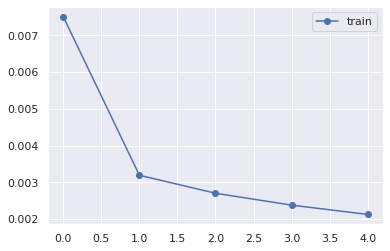

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

plt.plot(hist_loss, 'o-', label='train')
plt.legend()

9. **[EXTRA]** Plot the confusion matrix for your result model. I suggest using [Seaborn](https://seaborn.pydata.org/). And evaluate the performance of your model.